Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [4]:
sat_df = pd.read_csv('../data/database.csv')

In [5]:
sat_df.T

,0,1,2,3,4,5,6,7,8,9,...,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419
Official Name of Satellite,AAUSat-4,ABS-2,ABS-2A,ABS-3,ABS-3A,ABS-4,ABS-6,ABS-7,USA 139,USA 171,...,Zhongxing 12,Zhongxing 1A,Zhongxing 20A,Zhongxing 22A,Zhongxing 2A,Zhongxing 9,Zijing 1,Ziyuan 1-02C,Ziyuan 3,Ziyan 3-2
Country/Organization of UN Registry,NR,NR,NR,Philippines,NR,NR,NR,South Korea,USA,USA,...,China/Sri Lanka,China,China,China,China,China,NR,China,China,NR
Operator/Owner,University of Aalborg,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,National Reconnaissance Office (NRO),National Reconnaissance Office (NRO),...,China Satellite Communication Corp. (China Sat...,People's Liberation Army (C41),People's Liberation Army (C41),China Satellite Communication Corp. (China Sat...,People's Liberation Army (C41),China Satellite Communication Corp. (China Sat...,Tsinghua University,China Centre for Resources Satellite Data and ...,China Centre for Resources Satellite Data and ...,China Centre for Resources Satellite Data and ...
Country of Operator/Owner,Denmark,Multinational,Multinational,Multinational,Multinational,Multinational,Multinational,Multinational,USA,USA,...,China,China,China,China,China,China,China,China,China,China
Users,Civil,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Military,Military,...,Government,Military,Military,Military,Military/Government,Government,Civil,Government,Government,Government
Purpose,Earth Observation,Communications,Communications,Communications,Communications,Communications,Communications,Communications,Earth Observation,Earth Observation,...,Communications,Communications,Communications,Communications,Communications,Communications,Technology Development,Earth Observation,Earth Observation,Earth Observation
Detailed Purpose,Automatic Identification System (AIS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electronic Intelligence,Electronic Intelligence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Optical Imaging,Optical Imaging,Optical Imaging
Class of Orbit,LEO,GEO,GEO,GEO,GEO,GEO,GEO,GEO,GEO,GEO,...,GEO,GEO,GEO,GEO,GEO,GEO,LEO,LEO,LEO,LEO
Type of Orbit,Sun-Synchronous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sun-Synchronous,Sun-Synchronous,Sun-Synchronous,Sun-Synchronous
Longitude of Geosynchronous Orbit (Degrees),0.0,75.0,-75.0,146.06,-3.0,75.0,159.0,116.18,-14.5,95.4,...,87.5,129.84,130.0,103.28,98.0,92.22,0.0,0.0,0.0,0.0


In [6]:
sat_df.describe()

,Longitude of Geosynchronous Orbit (Degrees),Perigee (Kilometers),Apogee (Kilometers),Eccentricity,Inclination (Degrees),NORAD Number
count,1402.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000
mean,5.786598,14604.973221,16532.527837,0.020815,50.278703,34574.525722
std,53.973571,16550.261760,22155.693096,0.112768,41.841954,6087.083306
min,-177.120000,200.000000,322.000000,0.000000,0.000000,7530.000000
25%,0.000000,621.000000,687.000000,0.000210,0.090000,28377.000000
50%,0.000000,1357.000000,1415.000000,0.000534,54.970000,37234.000000
75%,0.000000,35770.000000,35795.000000,0.001580,97.460000,40022.000000
max,328.500000,62200.000000,330000.000000,0.957000,143.400000,41634.000000


In [7]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Official Name of Satellite                   1420 non-null   object 
 1   Country/Organization of UN Registry          1420 non-null   object 
 2   Operator/Owner                               1419 non-null   object 
 3   Country of Operator/Owner                    1420 non-null   object 
 4   Users                                        1419 non-null   object 
 5   Purpose                                      1419 non-null   object 
 6   Detailed Purpose                             369 non-null    object 
 7   Class of Orbit                               1419 non-null   object 
 8   Type of Orbit                                899 non-null    object 
 9   Longitude of Geosynchronous Orbit (Degrees)  1402 non-null   float64
 10  

In [16]:
sat_df.isnull().sum()

Official Name of Satellite                        0
Country/Organization of UN Registry               0
Operator/Owner                                    1
Country of Operator/Owner                         0
Users                                             1
Purpose                                           1
Detailed Purpose                               1051
Class of Orbit                                    1
Type of Orbit                                   521
Longitude of Geosynchronous Orbit (Degrees)      18
Perigee (Kilometers)                              1
Apogee (Kilometers)                               1
Eccentricity                                      1
Inclination (Degrees)                             1
Period (Minutes)                                  3
Launch Mass (Kilograms)                         103
Dry Mass (Kilograms)                            947
Power (Watts)                                   771
Date of Launch                                    4
Expected Lif

In [8]:
sat_df.isnull().value_counts()

Official Name of Satellite  Country/Organization of UN Registry  Operator/Owner  Country of Operator/Owner  Users  Purpose  Detailed Purpose  Class of Orbit  Type of Orbit  Longitude of Geosynchronous Orbit (Degrees)  Perigee (Kilometers)  Apogee (Kilometers)  Eccentricity  Inclination (Degrees)  Period (Minutes)  Launch Mass (Kilograms)  Dry Mass (Kilograms)  Power (Watts)  Date of Launch  Expected Lifetime (Years)  Contractor  Country of Contractor  Launch Site  Launch Vehicle  COSPAR Number  NORAD Number
False                       False                                False           False                      False  False    True              False           True           False                                        False                 False                False         False                  False             False                    False                 False          False           False                      False       False                  False        False           Fa

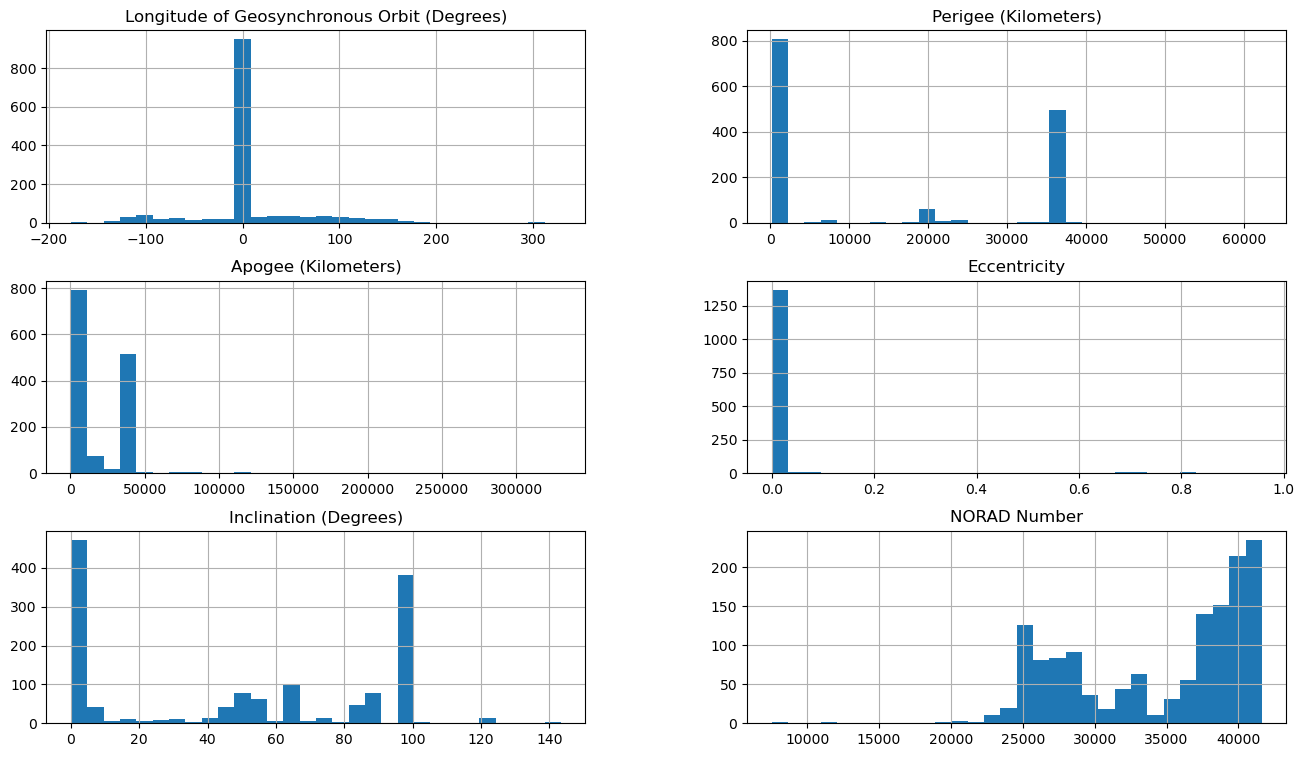

In [9]:
sat_df.hist(bins=30,figsize=(16,9))
plt.show()

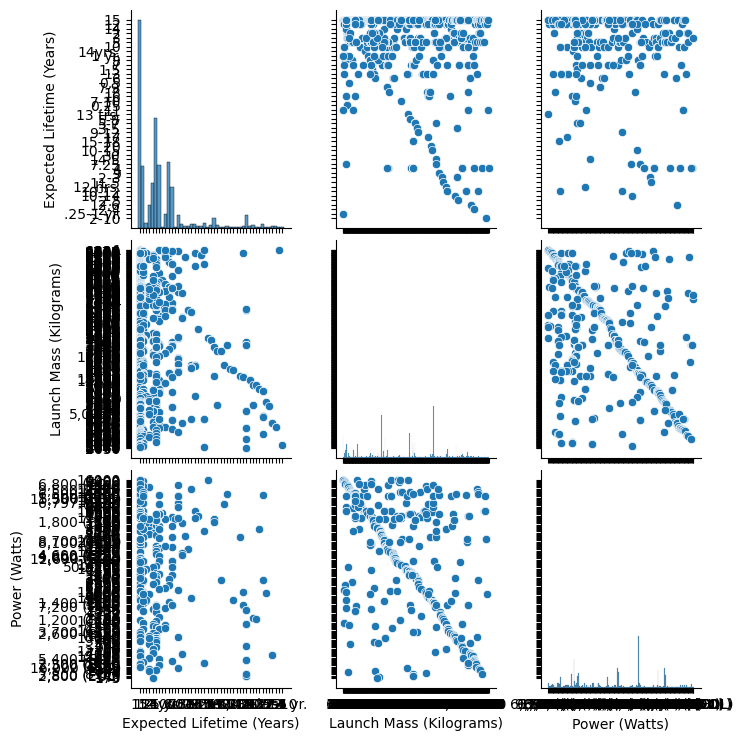

In [10]:
sns.pairplot(sat_df, vars=["Expected Lifetime (Years)", "Launch Mass (Kilograms)", "Power (Watts)"])
plt.show()

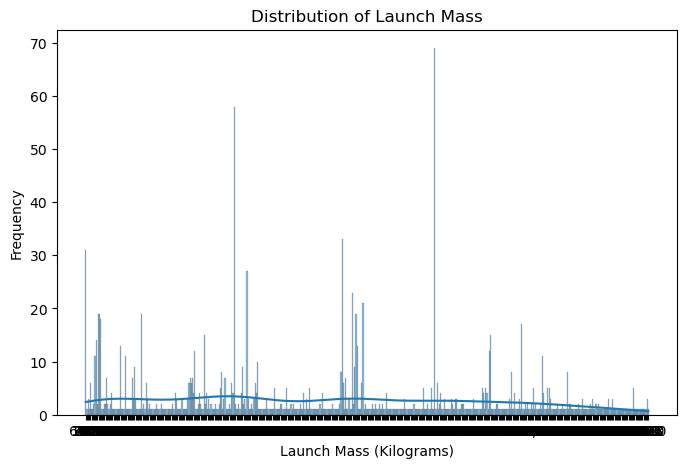

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(sat_df["Launch Mass (Kilograms)"], bins=20, kde=True)
plt.xlabel("Launch Mass (Kilograms)")
plt.ylabel("Frequency")
plt.title("Distribution of Launch Mass")
plt.show()

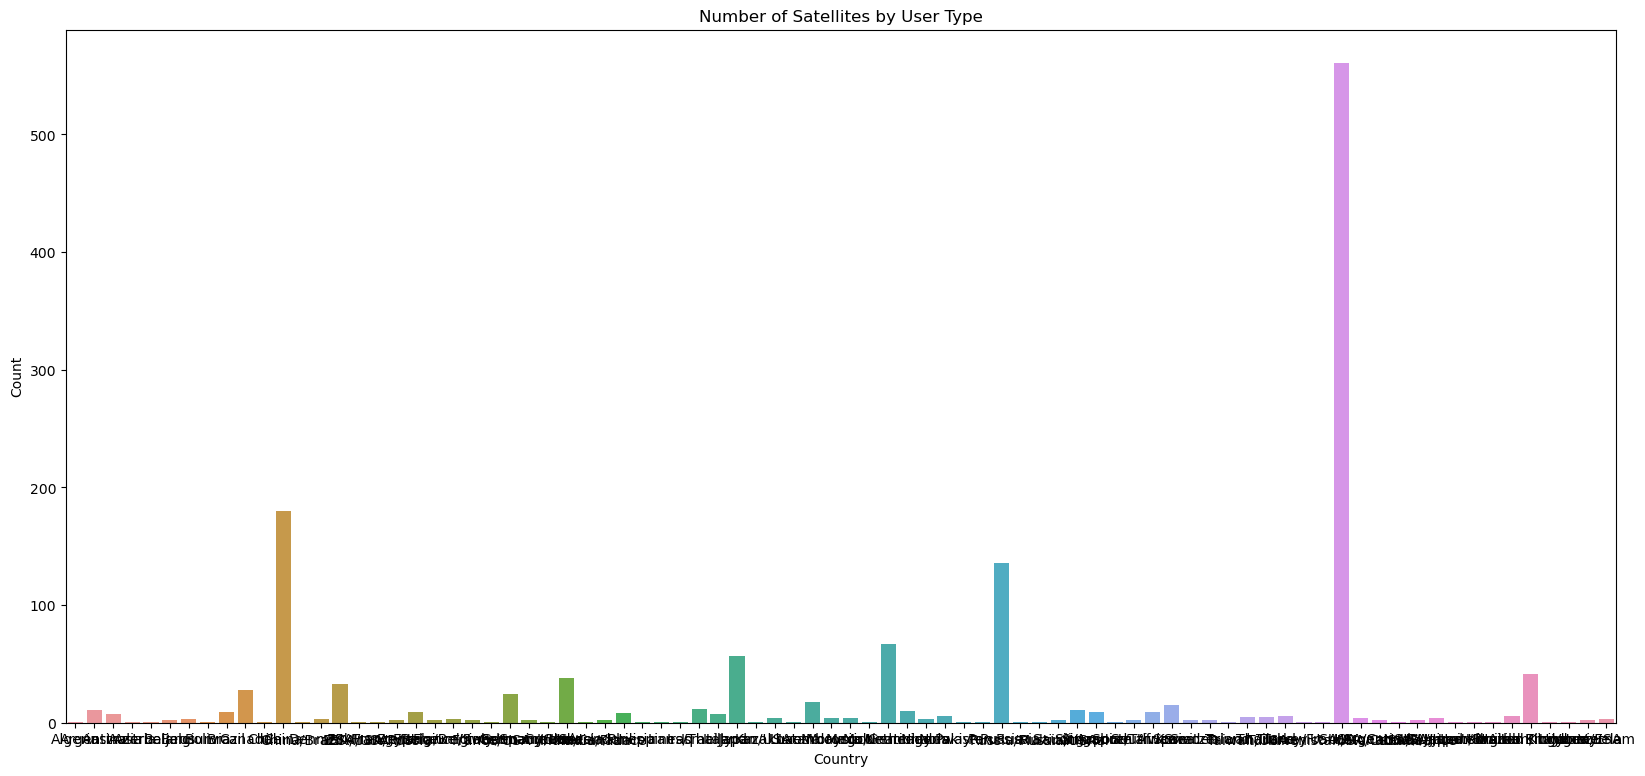

In [27]:
#Would change this to show top 10 only if I choose this dataset
plt.figure(figsize=(20, 9))
sns.countplot(x="Country of Operator/Owner", data=sat_df)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Number of Satellites by User Type")
plt.show()

C:\Users\joshy\AppData\Local\Temp\ipykernel_36204\2818007933.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sat_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


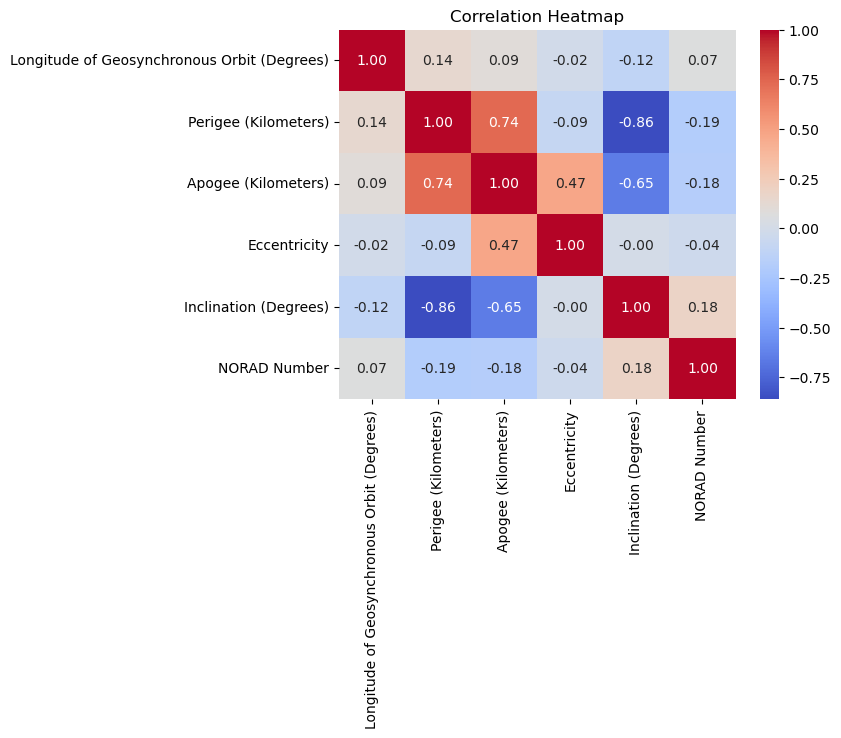

In [11]:
sns.heatmap(sat_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Dummy variable

In [12]:
data = pd.get_dummies(sat_df, columns=["Country of Operator/Owner"], drop_first=True)

In [13]:
target = data["Expected Lifetime (Years)"]
features = data.drop("Expected Lifetime (Years)", axis=1)

In [14]:
features = sm.add_constant(features)

In [15]:
print(features)

      const Official Name of Satellite Country/Organization of UN Registry  \
0       1.0                   AAUSat-4                                  NR   
1       1.0                      ABS-2                                  NR   
2       1.0                     ABS-2A                                  NR   
3       1.0                      ABS-3                         Philippines   
4       1.0                     ABS-3A                                  NR   
...     ...                        ...                                 ...   
1415    1.0                Zhongxing 9                               China   
1416    1.0                   Zijing 1                                  NR   
1417    1.0               Ziyuan 1-02C                               China   
1418    1.0                   Ziyuan 3                               China   
1419    1.0                  Ziyan 3-2                                  NR   

                                         Operator/Owner       U